In [2]:
import pandas as pd
import numpy as np
from sklearn import * 
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import plot_confusion_matrix

%matplotlib inline

In [3]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

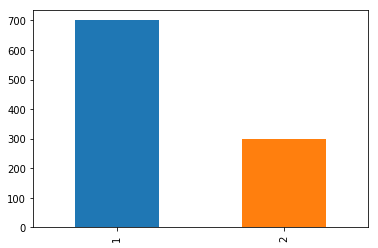

In [5]:
df.default.value_counts().plot.bar()

Test accuracy 0.6966666666666667


(<matplotlib.figure.Figure at 0x1a1ecdecf8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1f2ffc50>)

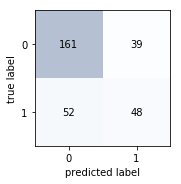

In [34]:
target = "default"
y = np.where(df[target] == 2, 1, 0)
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                            test_size = 0.3, random_state = 123)
pipe = pipeline.Pipeline([
    ("est", tree.DecisionTreeClassifier(max_depth = 3))
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob>0.5, 1, 0)

print("Test accuracy", pipe.score(X_test, y_test))
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

Text(0,0.5,'TPR')

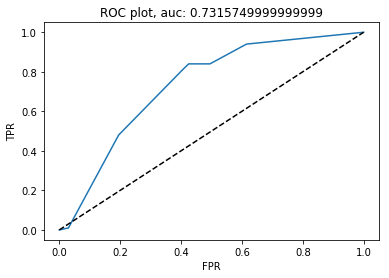

In [35]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color = "black", ls = "--")
plt.title("ROC plot, auc: " + str(metrics.auc(fpr, tpr)))
plt.xlabel("FPR")
plt.ylabel("TPR")

Test accuracy 0.7166666666666667


(<matplotlib.figure.Figure at 0x1a1f2159b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1f17e668>)

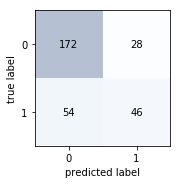

In [36]:
target = "default"
y = np.where(df[target] == 2, 1, 0)
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                            test_size = 0.3, random_state = 123)
pipe = pipeline.Pipeline([
    ("est", ensemble.RandomForestClassifier(max_depth = 3, random_state=1, 
                            max_features=0.8, n_estimators = 20 ))
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)

y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob>0.43, 1, 0)

print("Test accuracy", pipe.score(X_test, y_test))
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

Text(0,0.5,'TPR')

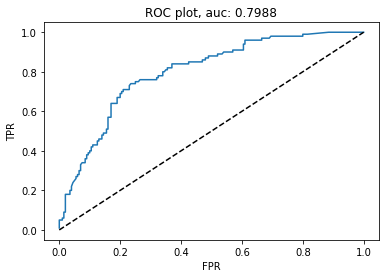

In [37]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color = "black", ls = "--")
plt.title("ROC plot, auc: " + str(metrics.auc(fpr, tpr)))
plt.xlabel("FPR")
plt.ylabel("TPR")

In [38]:
est = pipe.steps[-1][-1]
est

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=0.8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [42]:
pd.Series(y_train).value_counts()/len(y_train)

0    0.714286
1    0.285714
dtype: float64